In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        # Your code starts here
        data = np.genfromtxt(filename, delimiter=',', skip_header=1, dtype=np.uint8)
        labels = data[:,0]
        images = data[:,1:]
        images = np.reshape(images,(data.shape[0],28,28))
        # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(training_images, training_labels)

validation_generator = validation_datagen.flow(testing_images, testing_labels)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [14]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),

   
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    #tf.keras.layers.Dense(len((np.unique(training_labels))+1), activation='softmax')
    tf.keras.layers.Dense(26, activation='softmax')
    
    #Available labels are {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}.
    #There is no class corresponding to the numerical label 9.
    #But in case of both, 'sparse_categorical_crossentropy' (using ) and 'tf.keras.utils.to_categorical', the total number of classes are inferred to be the 25 (0 to 24),
    #even if the class corresponding to the numerical label 9 is missing in the dataset.
    #Therefore, we need at least 25 units in the Dense 'softmax' layer for the given dataset.
    #Or, you can also down-shift the labels 10, 11, ... , 24 to 9, 10, ... , 23 and then len(np.unique(training_labels)) units in the 'softmax' layers will work just fine. 
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=15, steps_per_epoch=32, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/15
32/32 [==============================] - 2s 73ms/step - loss: 3.2286 - accuracy: 0.0400 - val_loss: 3.2356 - val_accuracy: 0.0417
Epoch 2/15
32/32 [==============================] - 2s 65ms/step - loss: 3.2000 - accuracy: 0.0459 - val_loss: 3.1887 - val_accuracy: 0.0312
Epoch 3/15
32/32 [==============================] - 2s 60ms/step - loss: 3.1797 - accuracy: 0.0625 - val_loss: 3.1686 - val_accuracy: 0.0833
Epoch 4/15
32/32 [==============================] - 2s 60ms/step - loss: 3.1297 - accuracy: 0.0693 - val_loss: 3.1077 - val_accuracy: 0.0729
Epoch 5/15
32/32 [==============================] - 2s 62ms/step - loss: 3.0582 - accuracy: 0.0929 - val_loss: 2.9552 - val_accuracy: 0.1042
Epoch 6/15
32/32 [==============================] - 2s 60ms/step - loss: 3.0460 - accuracy: 0.0986 - val_loss: 2.9787 - val_accuracy: 0.0521
Epoch 7/15
32/32 [==============================] - 2s 59ms/step - loss: 2.9729 - accuracy: 0.1074 - val_loss: 3.0924 - val_accuracy: 0.0312
Epoch 8/15
32

[101.02152667069528, 0.16076408]

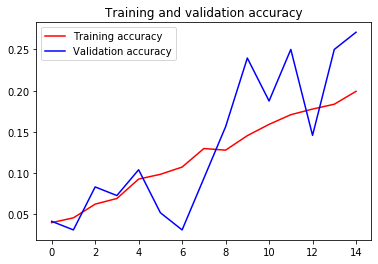

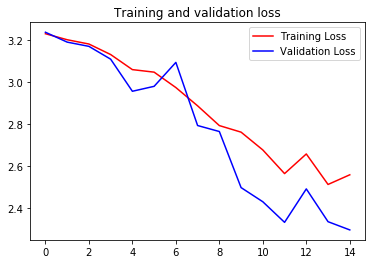

In [15]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);